# 1. Introduction
**The World Happiness Report** is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives,which the report also correlates with various life factors. As of March 2020, **Finland** was ranked the happiest country in the world three times in a row.

## History
In July 2011, the **UN General Assembly** adopted resolution 65/309 Happiness: Towards a Holistic Definition of Development inviting member countries to measure the happiness of their people and to use the data to help guide public policy. On April 2, 2012, this was followed by the first UN High Level Meeting called Wellbeing and Happiness: Defining a New Economic Paradigm, which was chaired by UN Secretary General Ban Ki-moon and Prime Minister Jigme Thinley of Bhutan, a nation that adopted **gross national happiness** instead of gross domestic product as their main development indicator.
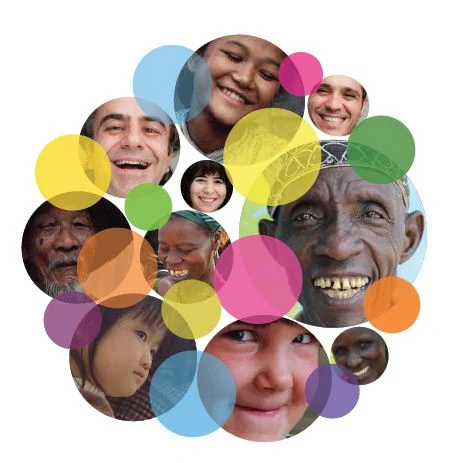
The first World Happiness Report was released on April 1, 2012 as a foundational text for the UN High Level Meeting: Well-being and Happiness: Defining a New Economic Paradigm, drawing international attention. The report outlined the state of world happiness, causes of happiness and misery, and policy implications highlighted by case studies. In 2013, the second World Happiness Report was issued, and since then has been issued on an annual basis with the exception of 2014.The report primarily uses data from the Gallup World Poll. Each annual report is available to the public to download on the World Happiness Report website

## Methods and Philosophy
The rankings of national happiness are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The report correlates the results with various life factors.

In the reports, experts in fields including economics, psychology, survey analysis, and national statistics, describe how **measurements of well-being can be used effectively to assess the progress of nations**, and other topics. Each report is organized by chapters that delve deeper into issues relating to happiness, including mental illness, the objective benefits of happiness, the importance of ethics, policy implications, and links with the Organisation for Economic Co-operation and Development's (OECD) approach to measuring subjective well-being and other international and national efforts.

# 2.Kernel Goals
There are three primary goals of this kernel.

* Do a **exploratory analysis** of the Happiness report Dataset
* Do an **visualization analysis** of the Happiness report Dataset
* **Regression model:** To create a multiple regression model considering happiness score as dependent variable
* **Learning Objective:** To understand which factor contributes to people's happines and where Government can focus better to improve the country's well being 

# 3. Importing libraries and exploring Data
## 3a.Importing Libraries
Python is a fantastic language with a vibrant community that produces many amazing libraries. I am not a big fan of importing everything at once for the newcomers. So, I am going to introduce a few necessary libraries for now, and as we go on, we will keep unboxing new libraries when it seems appropriate

In [1]:
#load packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pylab as pylab
import numpy as np
import sklearn
import warnings
warnings.filterwarnings('ignore')
print('-'*25)
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

-------------------------
world-happiness



In [2]:
#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## 3b.Extracting data
Let's load each year's data in different object variable 

In [3]:
year_2015=pd.read_csv("../input/world-happiness/2015.csv")
year_2016=pd.read_csv("../input/world-happiness/2016.csv")
year_2017=pd.read_csv("../input/world-happiness/2017.csv")
year_2018=pd.read_csv("../input/world-happiness/2018.csv")
year_2019=pd.read_csv("../input/world-happiness/2019.csv")

## 3c. Examining the dataset
Let's explore what do we have in each year's dataset

In [4]:
year_2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [5]:
year_2016_copy=year_2016.copy()
year_2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [6]:
year_2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [7]:
year_2018.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [8]:
year_2019_copy=year_2019.copy()
year_2019.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


## 3d. Dataset analysis

### What are the columns?
If we have a close look into this data,Columns in this data set includes country, region, happiness ranking, happiness score,Economy(GDP), Freedom, Trust, Generosity Dystopia Residual. 

### What impacts happiness score?
Columns following the happiness score take into consideration six factors which make life evaluations higher in each country. These six variables are economic production, social support, life expectancy, freedom, absence of corruption, and generosity. Dystopia doesn't affect a country's happiness score it has values which is equal to the world's lowest national average for each of the six factors. It has no impact it is just used as a reference to compare with low averages. To understand our dataset, we need to understand our variables.

### Analysis of each variable
* Datasets contain 13 variables and 157 instances. 
* **Country** which is nominal variable. It contains 156 countries.
* **Region** which is also nominal. This breaks the data up into regions according to continent.
* **Happiness rank** which is numeric and ranks each country's happiness from 1-156 based on the world happiness score. 
* The world **happiness score** variable is numeric and is based on a happiness scale from one to ten. 
* **Lower and Upper confidence levels** are used to predict means these are both numeric.
* **Overall rank** is the country which are being ranked and sorted according to the happiness score 
* **GDP per capita** numeric variable which gives us insight into how well a country is doing economically. 
* **Family** is a numeric variable which gives us insight in how much a country values family.
* **Health care** is a numeric variable which is based on access, and quality of health care. 
* **Freedom and trust** are a numeric variable. This is based on how free do people feel in the given country and how much do they trust the government 
* **Generosity** is a numeric variable based on how generous the people are in the given country.
* **Dystopia Residual** is our last variable which is numeric an imaginary country that has the world's least happy people. It is imaginary country which has the world’s least-happy people. This variable is used to compare with other countries and evaluate their level of happiness. 
* **Perceptions of corruption** is how much the people think that government is coruppted
* **Social support** shows how much the Government supports citizens 
* **Freedom to make life choices** is the factor which shows the democracy and freedom of an individual in that country
* **Healthy life expectancy** shows the life expectancy rate of a citizen

## Important Notice for this Kernel:
Since we have many 4 years of data. It will take a lot of time to analyse each dataset. So I believe the best thing to do is to **analyse the latest(2019) data and prepare the report on its basis**. But of course we will visualise other years data to look at how things have changed over the course of time

In [9]:
#Looking at the datatypes of each factor
year_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

Except Rank and Country, every other factor's data types are **float **

## 3e. Statistical Measures

In [10]:
year_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


From the statistical measures we can infer that
* There are totally 156 countries taken into account for our dataset
* The average happiness score(5.4) indicates that there are no dystopian country as of now.
* There are countries which has minimum scores as zero, May be that contributed to less happiness score
* Citizens of many have considerable rate in freedom to make life choices

## 3f.Checking for missing data
Datasets in the real world are often messy, However, this dataset is almost clean and simple. Lets analyze and see what we have here.

In [11]:
print('Data columns with null values:',year_2019.isnull().sum(), sep = '\n')

Data columns with null values:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


Woof ! No need to sweat much in wrangling this dataset. There are no null values

# 4. Data Wrangling

## 4a. ....Outliers
 Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. In our case, I have found these two factors having outliers.

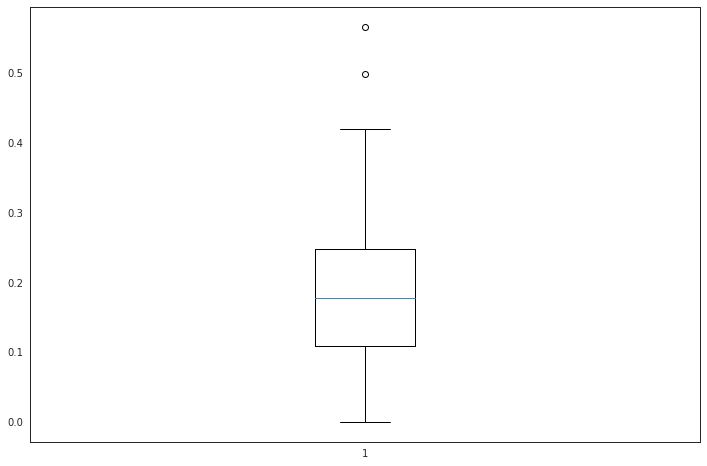

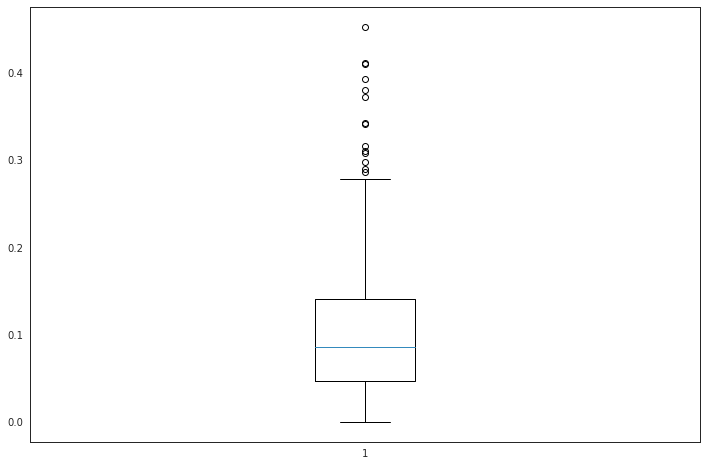

In [12]:
year_2019_columns=['Generosity','Perceptions of corruption']
for i in year_2019_columns:
    plt.boxplot(year_2019[i])
    plt.show()

### Removing outliers
Let's remove those outliers using IQR method

In [13]:
Q1 = year_2019['Generosity'].quantile(0.25)
Q3 = year_2019['Generosity'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (year_2019['Generosity'] >= Q1 - 1.5 * IQR) & (year_2019['Generosity'] <= Q3 + 1.2 *IQR)
year_2019_1=year_2019.loc[filter]

Q1 = year_2019_1['Perceptions of corruption'].quantile(0.25)
Q3 = year_2019_1['Perceptions of corruption'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (year_2019_1['Perceptions of corruption'] >= Q1 - 1.5 * IQR) & (year_2019_1['Perceptions of corruption'] <= Q3 + 0.6 *IQR)
cleaned_2019=year_2019_1.loc[filter]

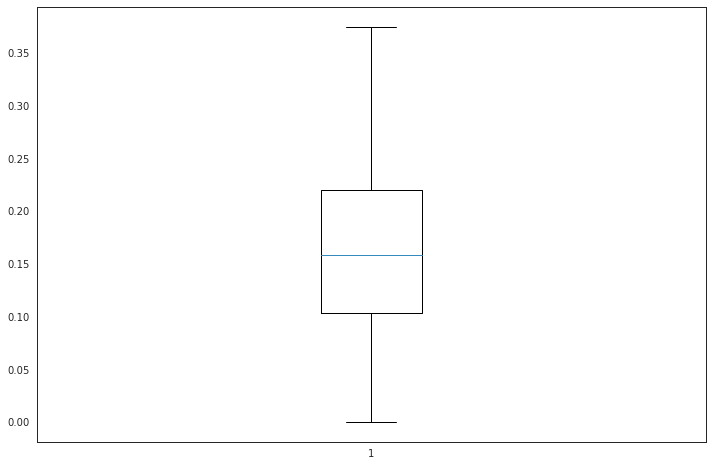

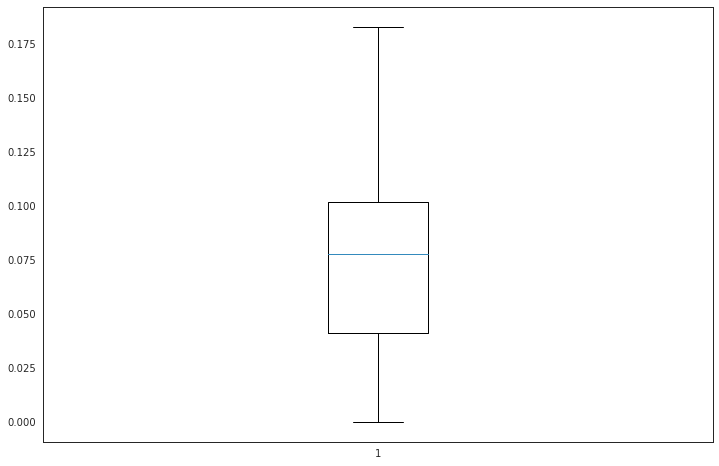

In [14]:
year_2019_columns=['Generosity','Perceptions of corruption']
for i in year_2019_columns:
    plt.boxplot(cleaned_2019[i])
    plt.show()

The outliers has been removed ! Great

# 5. Feature Engineering
Let's concatenate the common features seen among the dataframes

## 5b. Concatenating dataframes based on features

In [15]:
# 5a. Happiness score(year-wise)
data_1=[year_2019['Country or region'],year_2015['Happiness Score'],year_2016['Happiness Score'],year_2017['Happiness.Score'],
       year_2018['Score'],year_2019['Score']]
headers_1=["Country","2015","2016","2017","2018","2019"]
score = pd.concat(data_1, axis=1, keys=headers_1,join='inner')

# 5b. GDP per capita score (year-wise)
data_2=[year_2019['Country or region'],year_2015['Economy (GDP per Capita)'],year_2016['Economy (GDP per Capita)'],year_2017['Economy..GDP.per.Capita.'],
       year_2018['GDP per capita'],year_2019['GDP per capita']]
gdp = pd.concat(data_2, axis=1, keys=headers_1,join='inner')

# 5c. Health Life Expectancy score (year-wise)
data_3=[year_2019['Country or region'],year_2015['Health (Life Expectancy)'],year_2016['Health (Life Expectancy)'],year_2017['Health..Life.Expectancy.'],
       year_2018['Healthy life expectancy'],year_2019['Healthy life expectancy']]
life_exp = pd.concat(data_3, axis=1, keys=headers_1,join='inner')

# 5d. Freedom score (year-wise)
data_4=[year_2019['Country or region'],year_2015['Freedom'],year_2016['Freedom'],year_2017['Freedom'],
       year_2018['Freedom to make life choices'],year_2019['Freedom to make life choices']]
freedom = pd.concat(data_4, axis=1, keys=headers_1,join='inner')

# 5d. Generosity score (year-wise)
data_5=[year_2019['Country or region'],year_2015['Generosity'],year_2016['Generosity'],year_2017['Generosity'],
       year_2018['Generosity'],year_2019['Generosity']]
generosity = pd.concat(data_5, axis=1, keys=headers_1,join='inner')

In [16]:
gdp.head()

,Country,2015,2016,2017,2018,2019
0,Finland,1.39651,1.44178,1.616463,1.305,1.340
1,Denmark,1.30232,1.52733,1.482383,1.456,1.383
2,Norway,1.32548,1.42666,1.480633,1.351,1.488
3,Iceland,1.45900,1.57744,1.564980,1.343,1.380
4,Netherlands,1.32629,1.40598,1.443572,1.420,1.396


## 5b. Combining all dataframes

In [17]:
# Year 2019
year_2019.columns = ["rank","region","score",
                  "gdp_per_capita","social_support","healthy_life_expectancy",
                 "freedom_to_life_choice","generosity","corruption_perceptions"]

# Year 2018
year_2018.columns = ["rank","region","score",
                  "gdp_per_capita","social_support","healthy_life_expectancy",
                 "freedom_to_life_choice","generosity","corruption_perceptions"]

pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

# Year 2017
year_2017.drop(["Whisker.high","Whisker.low",
            "Family","Dystopia.Residual"],axis=1,inplace=True)

year_2017.columns =  ["region","rank","score",
                  "gdp_per_capita","healthy_life_expectancy",
                 "freedom_to_life_choice","generosity","corruption_perceptions"]

# Year 2016
year_2016.drop(['Region','Lower Confidence Interval','Upper Confidence Interval',
            "Family",'Dystopia Residual'],axis=1,inplace=True)

year_2016.columns = ["region","rank","score",
                  "gdp_per_capita","healthy_life_expectancy",
                 "freedom_to_life_choice","corruption_perceptions","generosity"]

# Year 2015
year_2015.drop(["Region",'Standard Error', 'Family', 'Dystopia Residual'],axis=1,inplace=True)
year_2015.columns = ["region", "rank", "score", 
                     "gdp_per_capita","healthy_life_expectancy", 
                     "freedom_to_life_choice", "corruption_perceptions", "generosity"]

#Adding year to all the dataframe
year_2015["year"] = 2015
year_2016["year"] = 2016
year_2017["year"] = 2017
year_2018["year"] = 2018
year_2019["year"] = 2019

final_happy = year_2015.append([year_2016,year_2017,year_2018,year_2019])
final_happy=final_happy.drop(['freedom_to_life_choice','freedom_to_life_choice','social_support'],axis=1)
final_happy.dropna(inplace=True)
final_happy.head()

,region,rank,score,gdp_per_capita,healthy_life_expectancy,corruption_perceptions,generosity,year
0,Switzerland,1,7.587,1.39651,0.94143,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,0.94784,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,0.87464,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,0.88521,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,0.90563,0.32957,0.45811,2015


# 6.Data Visualization
Let's dive into the pool of exploratory data analysis
## 6a.Top 10 Happy Countries
First let's see how those top happy countries have been through the years

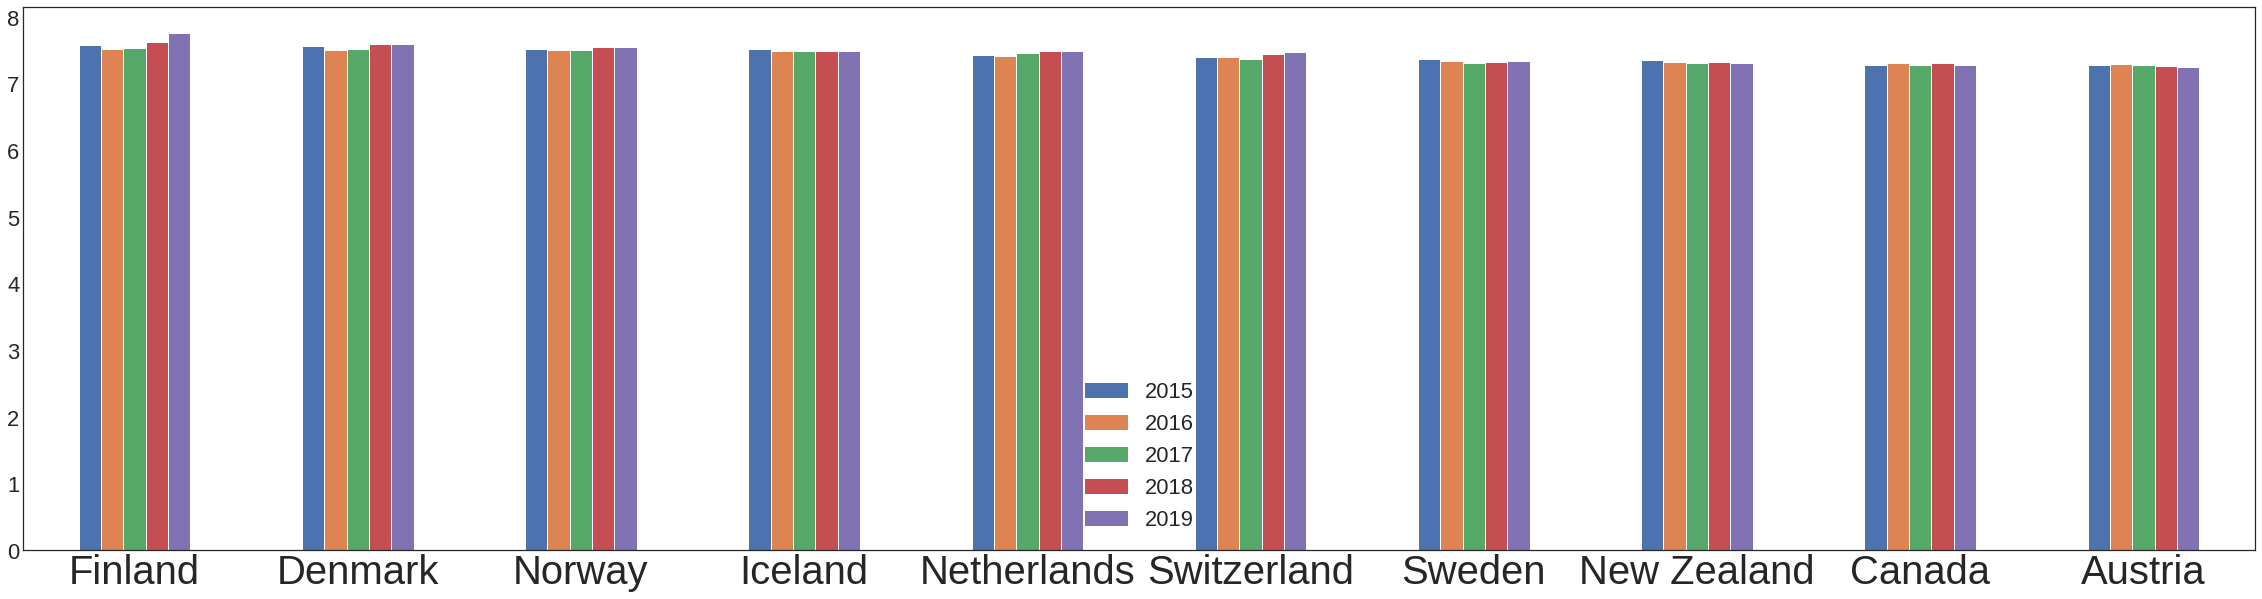

In [18]:
sns.set(font_scale = 2)
plt.style.use('seaborn-white')
labels = ['Finland','Denmark','Norway','Iceland','Netherlands','Switzerland','Sweden','New Zealand','Canada','Austria']
top_10=score.head(10)
ax=top_10.plot.bar(rot=0)
ax.set_xticklabels(labels)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=40)
fig = plt.gcf()
fig.set_size_inches(40,10)

**Inference**
* Many Countries were very consistent in maintaining the scores around 7
* **Finland** has shown a better improvement by increase in their score every year
* **Austria**'s happiness score has been sloping down at a small rate in all the consecutive years. 
* There has been a very **short dip in 2017** in all the happy countries

## 6b.Last 10 Happy Countries
Let's see how those least happy countries have been through the years

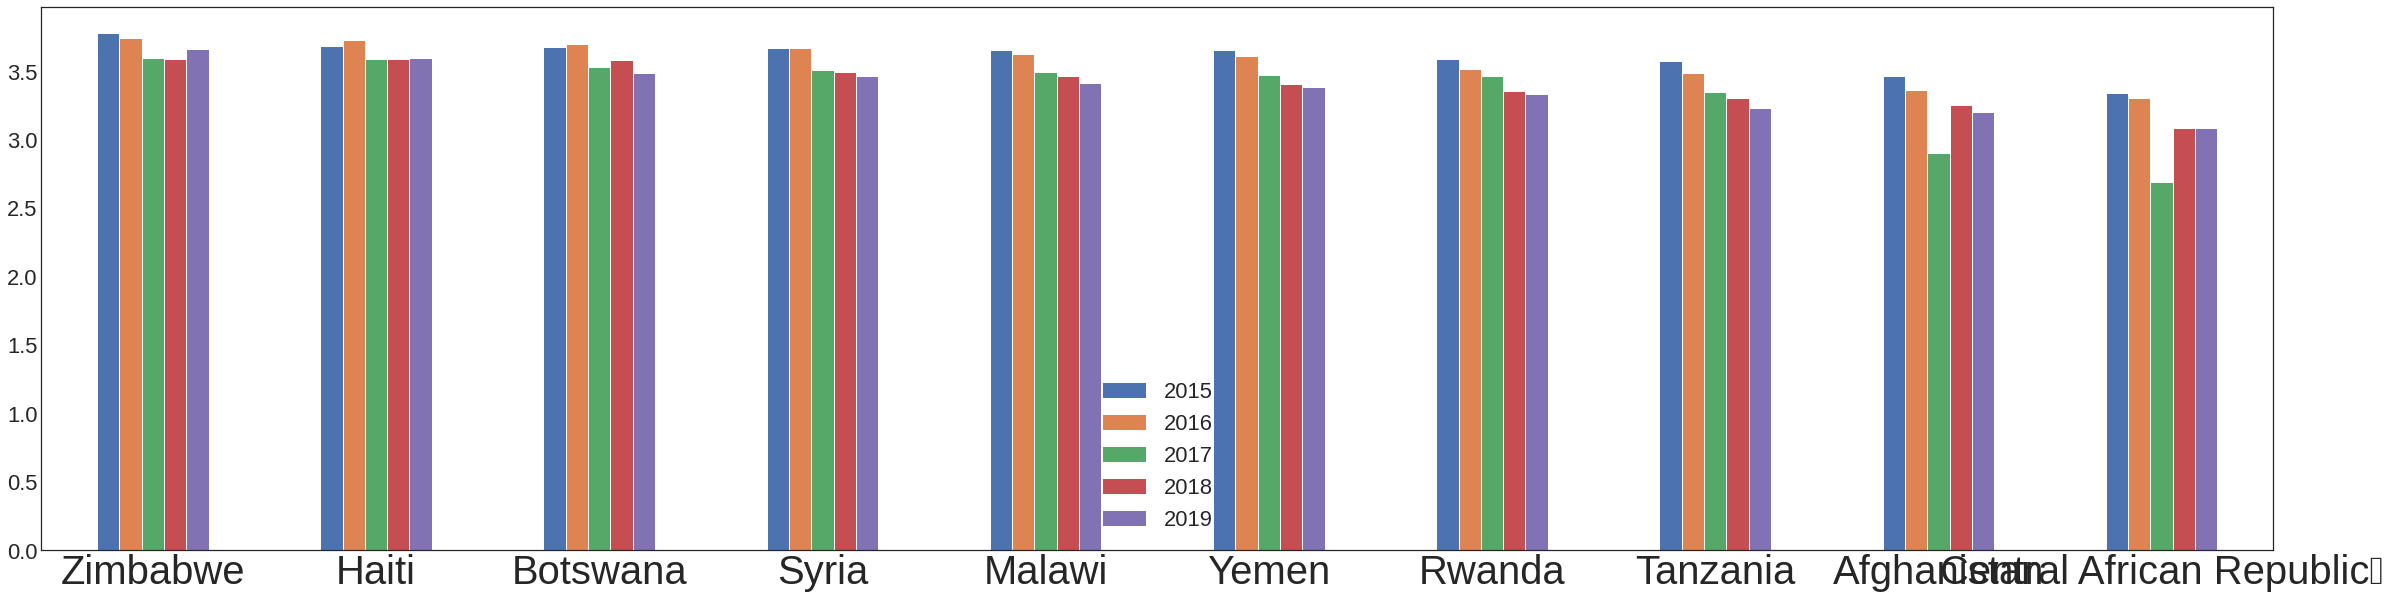

In [19]:
sns.set(font_scale = 2)
plt.style.use('seaborn-white')
labels_tail = ['Zimbabwe','Haiti','Botswana','Syria','Malawi','Yemen','Rwanda','Tanzania','Afghanistan','Central African Republic	']
top_10=score.tail(10)
ax=top_10.plot.bar(rot=0)
ax.set_xticklabels(labels_tail)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=40)
fig = plt.gcf()
fig.set_size_inches(40,10)

**Inferences**
* There are many countries which have been **sloping down** from 2015 to 2019
* **Worst dip** was seen in 2017 for all countries especially Afghanistan and Africa
* Besides **Africa and Afghanistan** have shown and immediate growth the next year
* No country in this list has ever crossed **happiness rating 4**

## 6c. Top 10 GDP Performances
Now let's check out happy countries GDP performances

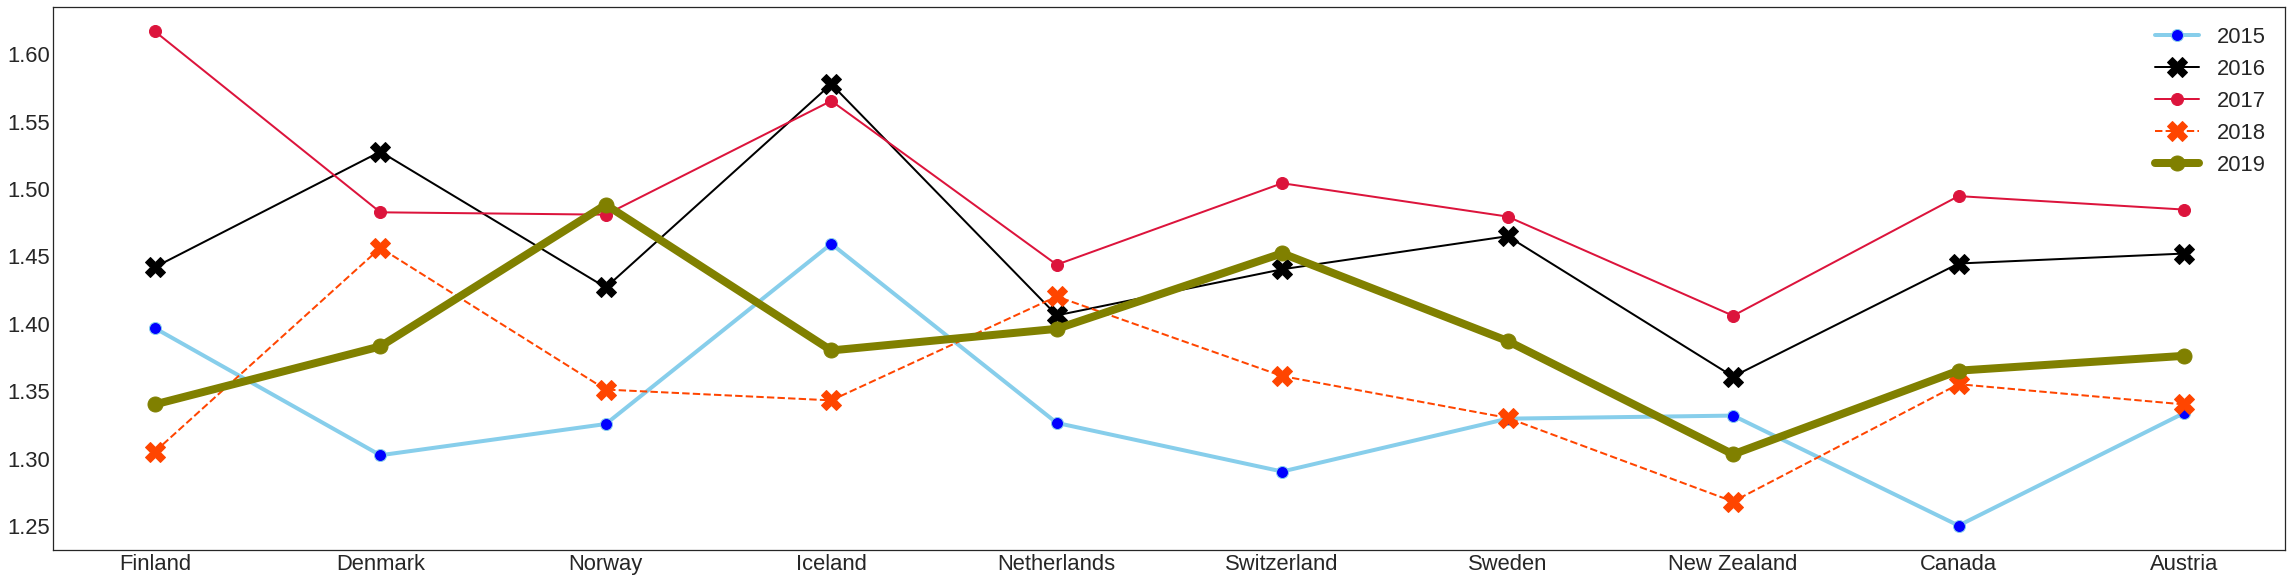

In [20]:
gdp_10=gdp.head(10)
plt.plot( 'Country', '2015', data=gdp_10, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Country', '2016', data=gdp_10, marker='X', color='black', markersize=20, linewidth=2)
plt.plot( 'Country', '2017', data=gdp_10, marker='o', color='crimson', markersize=12, linewidth=2, linestyle='solid', label="2017")
plt.plot( 'Country', '2018', data=gdp_10, marker='X', color='orangered', markersize=20, linewidth=2, linestyle='dashed', label="2018")
plt.plot( 'Country', '2019', data=gdp_10, marker='o', color='olive', markersize=15, linewidth=8, linestyle='solid', label="2019")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(40,10)

**Inferences**
* **Switzerland and Norway** has shown significant improvement in GDP rates
* **New Zealand and Finlan**d rates have sloped down but has a better score than 2018
* **2018** has become one of the worst years in regards with GDP for all these countries
* **2017** was a better country in their GDP performance rate. Hmm, but these Country's happiness level dipped in that year only. **Does that mean GDP has no influence in Happiness**? Let's find out

## 6d.Life Expectancy across Countries
Let's check out the life expectancy rate in all countries

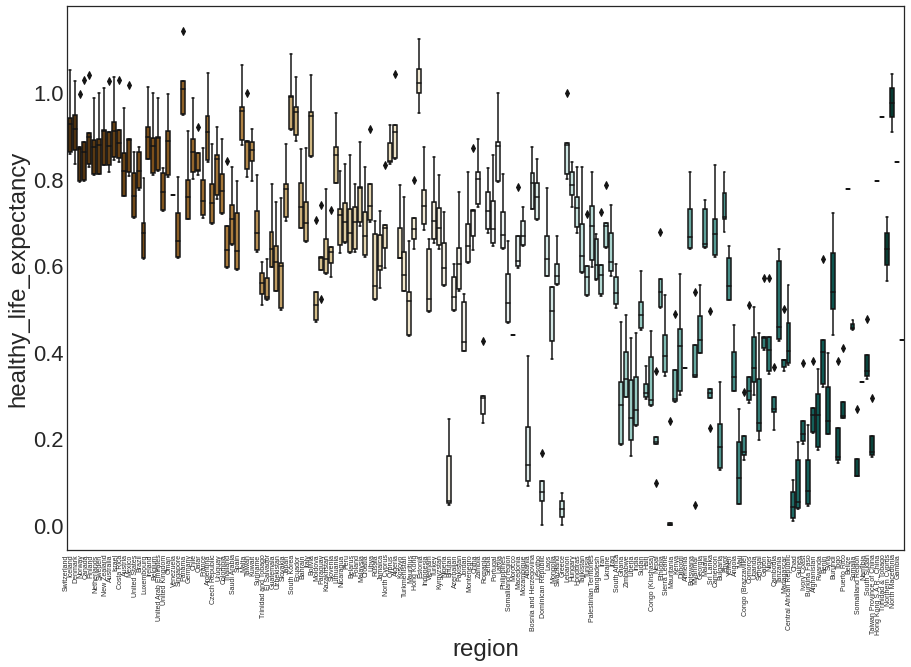

In [21]:
ax=sns.boxplot(y='healthy_life_expectancy', x='region', 
                 data=final_happy, 
                 palette="BrBG",
                 dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7,rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,10)

**Inferences**
* As the countries are sorted, we can clearly **see the dip in life expectancy** rate as we move down
* There are very **less outliers** in our dataset
* The last country **Gambia** has better life expectancy besides having lowest happiness score


## 6e. Top vs Bottom- Corruption free countries
Let's see the top and bottom countries as per corruption free rate

Text(0, 0.5, 'Corruption rate')

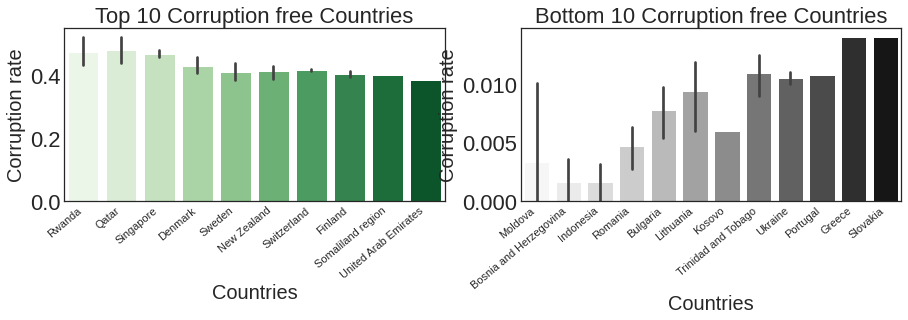

In [22]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(2,2,1)
top_10_corrupt=final_happy[['region', 'corruption_perceptions']].sort_values(by = 'corruption_perceptions',ascending = False).head(32)
ax=sns.barplot(x="region", y="corruption_perceptions", data=top_10_corrupt, palette="Greens")
ax.set_xticklabels(ax.get_xticklabels(),fontsize=11,rotation=40, ha="right")
ax.set_title('Top 10 Corruption free Countries',fontsize= 22)
ax.set_xlabel('Countries',fontsize = 20) 
ax.set_ylabel('Corruption rate', fontsize = 20)

plt.subplot(2,2,2)
bot_10_corrupt=final_happy[['region', 'corruption_perceptions']].sort_values(by = 'corruption_perceptions',ascending = True).head(32)
ax=sns.barplot(x="region", y="corruption_perceptions", data=bot_10_corrupt,palette="Greys")
ax.set_xticklabels(ax.get_xticklabels(),fontsize=11, rotation=40, ha="right")
ax.set_title('Bottom 10 Corruption free Countries',fontsize= 22)
ax.set_xlabel('Countries',fontsize = 20) 
ax.set_ylabel('Corruption rate', fontsize = 20)

**Inference**
* **Rwanda** shocingly tops the list besides its poor economy.
* **Qatar and Singapore** preceeds Rwanda which can be easily considered regarding the GDP growth 
* It is shocing to see **Indonesia** in the bottom list considering its economy growth
* The reason **Maldova** is in the last position because there are lot of complaints on the government and the people aren't much happy about it

## 6f. Top vs Bottom- Generous countries
Let's see the top and bottom countries as per Generosity scores

Text(0, 0.5, 'Generosity rate')

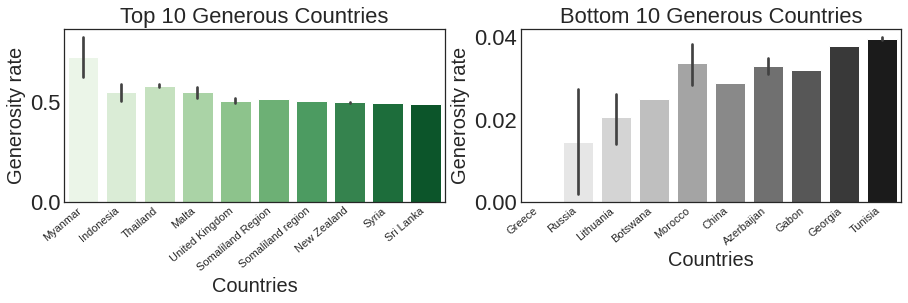

In [23]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(2,2,1)
top_10_Generous=final_happy[['region', 'generosity']].sort_values(by = 'generosity',ascending = False).head(24)
ax=sns.barplot(x="region", y="generosity", data=top_10_Generous, palette="Greens")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Generous Countries',fontsize = 22)
ax.set_xlabel('Countries',fontsize = 20) 
ax.set_ylabel('Generosity rate', fontsize = 20)


plt.subplot(2,2,2)
bot_10_Generous=final_happy[['region', 'generosity']].sort_values(by = 'generosity',ascending = True).head(24)
ax=sns.barplot(x="region", y="generosity", data=bot_10_Generous,palette="Greys")
ax.set_xticklabels(ax.get_xticklabels(),fontsize=11, rotation=40, ha="right")
ax.set_title('Bottom 10 Generous Countries',fontsize = 22)
ax.set_xlabel('Countries',fontsize = 20) 
ax.set_ylabel('Generosity rate', fontsize = 20)

**Inference**
* **Indonesia** being at the bottom of corruption free countries and tops the generous country list sounds so fishy
* **China** positioned 6th in the least generous countries, as we can conclude from the political war going on between other nations with China
* **Greece** has been put to the lowest generous country

## 6g.Happiness Score Based on Region- Bar plot(2016)
Let's look at the happiness score based on regions in 2016

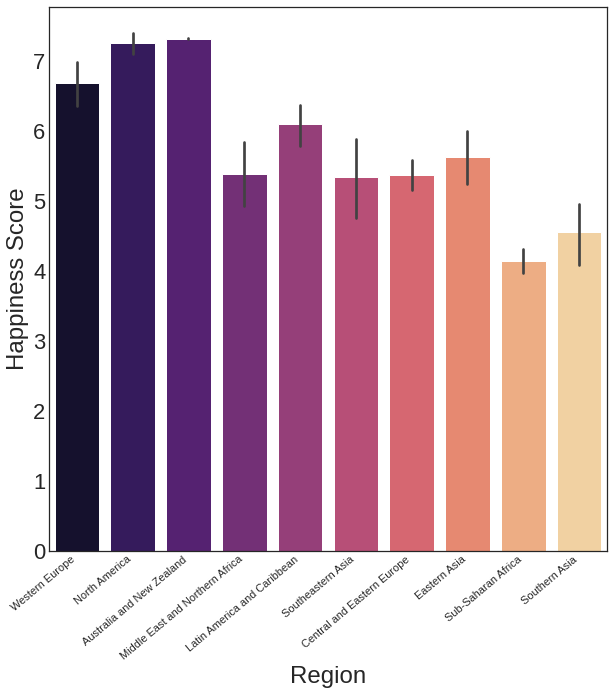

In [24]:
ax=sns.barplot(x="Region", y="Happiness Score", data=year_2016_copy, palette="magma")
ax.set_xticklabels(ax.get_xticklabels(),fontsize=11, rotation=40, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,10)

**Inference**
* Besides Western Europe countries were the toppers, we can see **North America and Austria & New Zealand** has cummulatively better scores
* As expected **Africa** has the lowest happiness due its poverty and famines
* **Latin America** succeeds in the 4th position and the rest have scores around 5

## 6h.Relationship between factors-Pair plot(2019)

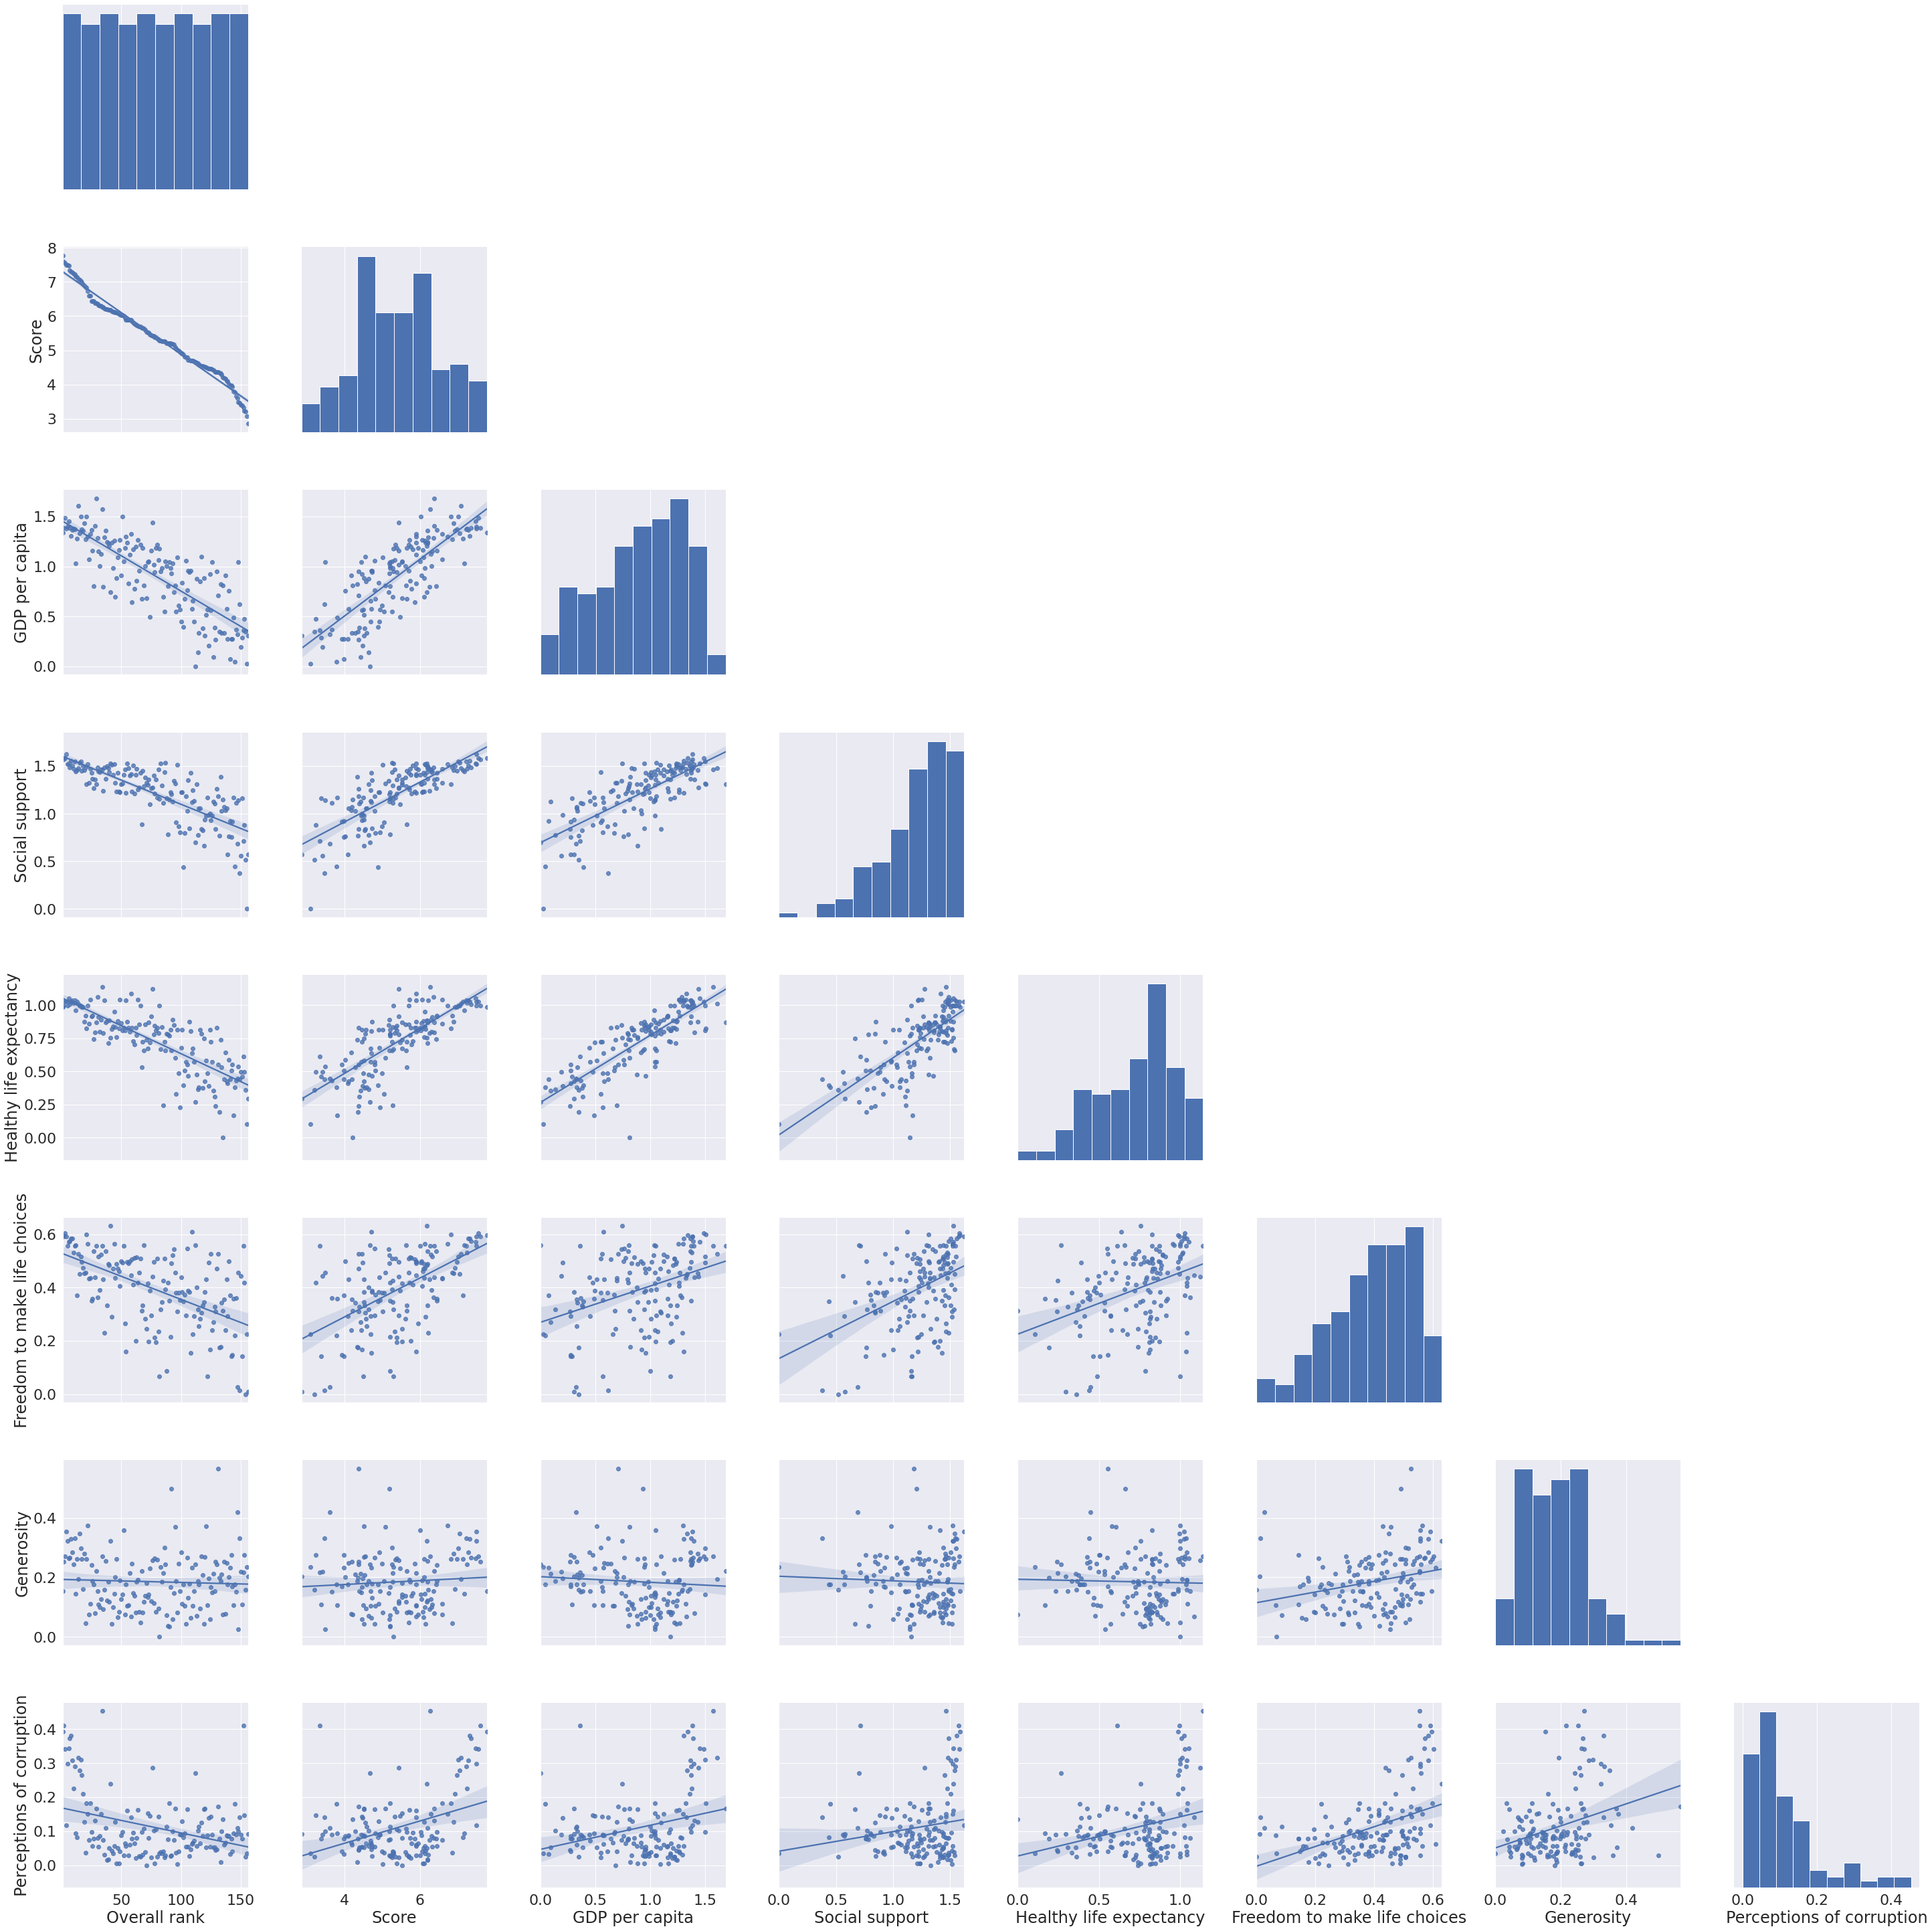

In [25]:
sns.set(font_scale = 2)
sns.pairplot(year_2019_copy,size=5,corner=True,kind="reg")

**Inferences**
* There's a positive correlation between **social support with  happiness score and life expectancy**
* Most of the country's citizen have **low perceptions on corruption of government**
* There are no factors which correlates with generosity
* **GDP** has high correlation with **social support and life expectancy**
* **Freedom** has good correlation with **happiness score and as well as GDP and life expectancy**
* Perceptions of corruption factor is **right skewed** and Social support factor is **left skewed**

## 6i. Happiness Around the World

In [26]:
#Inspired from: https://www.kaggle.com/mshinde10/predicting-world-happiness
import plotly.graph_objs as go
from plotly.offline import iplot

map_happy = dict(type = 'choropleth', 
           locations = year_2019_copy['Country or region'],
           locationmode = 'country names',
           z = year_2019_copy['Score'], 
           text = year_2019_copy['Country or region'],
           colorbar = {'title':'Happiness score'})

layout = dict(title = 'Happiness Score across the World', 
              geo = dict(showframe = False, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [map_happy], layout=layout)
iplot(choromap3)

**Inference:**
* **Most of the Asian and African countries** has low happiness score
* **American countries** has comparitively better happiness score


# 7.Regression model- Happiness Score
In this kernel, we ar not going to come up with advanced Machine Learning models as it doesn't serve much value to the context. Despite we know that all the factors are contributing to the happiness score, we can expect a good regression model
### Declare the dependent and independent variables
Lets select our independent(x) and dependent variable(y)

In [27]:
# Dataframe for regression model
reg_model=year_2019_copy.drop(['Overall rank','Country or region'],axis=1)
# Outcome and Explanatory variables
x = reg_model.drop(['Score'],axis=1)
y = reg_model['Score']

## Regression model
Here we use multiple linear regression

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
print("Regression coefficients:",reg.coef_)
print("Regression intercept:",reg.intercept_)
print("R square value:",reg.score(x,y))

Regression coefficients: [0.77537163 1.12419158 1.07814273 1.45483237 0.48978335 0.97228022]
Regression intercept: 1.7952202293072812
R square value: 0.7791638079594221


The R square value is 0.78 .This statistic indicates **78%** of the variance in the dependent variable that the independent variables explain collectively. It also determines how well the model fits the data.

### Finding Adjusted R-square
Since we have multiple features, it's better to check the adjusted R square value to gain a standard unbaised result neglecting the less useful feature.

In [29]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R square value:",adjusted_r2)

Adjusted R square value: 0.7702710753940296


Our adjusted R squared value is **0.77** which doesn't vary much from the R square value which shows that the model is fitted well despite additional features

In [30]:
from sklearn.feature_selection import f_regression
f_regression(x,y)
p_values = f_regression(x,y)[1]
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary ['Coefficients'] = reg.coef_
reg_summary ['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,GDP per capita,0.775372,0.000
1,Social support,1.124192,0.000
2,Healthy life expectancy,1.078143,0.000
3,Freedom to make life choices,1.454832,0.000
4,Generosity,0.489783,0.347
5,Perceptions of corruption,0.972280,0.000


As you can see from the summary, **Freedom and Social support** are the most influential feature in the model for Happiness Score. **Generosity** has low explanatory power in the model

## Regression using OLS

In [31]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Mon, 25 May 2020   Prob (F-statistic):           2.40e-46
Time:                        15:11:05   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.7952      0.211      8.505      0.000       1.378       2.212
GDP per capita                   0.7754      0.218      3.553      0.001       0.344       1.207
Social support                   1.1242      0.237      4.745      0.000       0.656       1.592
Healthy life expectancy          1.0781      0.335      3.223      0.002       0.417       1.739
Freedom to make life choices     1.4548      0.375      3.876      0.000       0.713       2.197
Generosity                       0.4898      0.498      0.984      0.327      -0.494       1.473
Perceptions of corruption        0.9723      0.542      1.793      0.075      -0.099       2.044
==============================================================================
Omnibus:                        8.188   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.971
Skew:                          -0.498   Prob(JB):                       0.0186
Kurtosis:                       3.483   Cond. No.                         28.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Inference**
* **F- Statistic:** 87% and probability of nearly 0 as shown that the whole model explains our data well and it is significant 
* **R Square and Adjusted R square:** Our adjusted R squared value is 0.77 which doesn't vary much from the R square value(0.77) which shows that the model is fitted well despite additional features
* **T statistic:** From the t test values the Generosity value(0.984) is very low and it has very low power and hinders the model performance and the **p value(0.327)** is higher than 0.05 so that feature is significant.

# Conclusion
From the extensive analysis on happiness score for the country we can conclude that the happiness of citizens in the country depends on the efficiency of the government which includes GDP, corruption, freedom provided. Healthy life expectancy also significantly influences the happiness of citizens. 
> For every minute you are angry you lose sixty seconds of happiness- Ralph Waldo Emerson

## Hit upvote if you like my work and also check out my [other notebooks](https://www.kaggle.com/benroshan/notebooks)